In [7]:
# baseado no exemplo: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [23]:
N_COLORS = 64
N_VAL_CH = 4

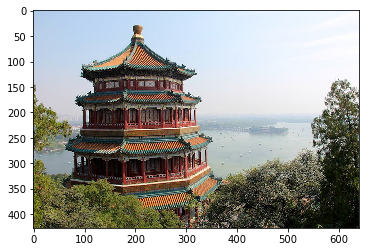

In [10]:
im_china = load_sample_image("china.jpg")

plt.imshow(im_china)

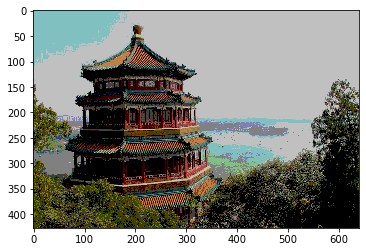

In [11]:
ratio = 256 / N_VAL_CH

im_round = im_china.copy()
im_round = np.int32((im_round // ratio) * ratio)

plt.imshow(im_round)

In [12]:
np.unique(im_round)

array([  0,  64, 128, 192])

In [24]:
%%time

X = im_china.reshape(-1, 3)
kmeans = KMeans(
    n_clusters=N_COLORS, 
    max_iter=10,
    random_state=42
)
kmeans.fit(X)
labels = kmeans.predict(X)

Wall time: 50.7 s


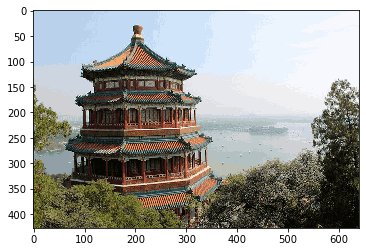

In [25]:
im_kmeans = np.zeros(im_china.shape)
im_labels = labels.reshape((im_china.shape[0], im_china.shape[1]))

for i in range(im_china.shape[0]):
    for j in range(im_china.shape[1]):
        im_kmeans[i, j, :] = kmeans.cluster_centers_[im_labels[i, j]]
        
im_kmeans = np.int32(im_kmeans)

plt.imshow(im_kmeans)